In [ ]:
# Run this once at the top of your notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from IPython.display import HTML
import ipywidgets as widgets


In [ ]:
def create_sphere():
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)
    X = np.cos(u) * np.sin(v)
    Y = np.sin(u) * np.sin(v)
    Z = np.cos(v)
    return X, Y, Z

X, Y, Z = create_sphere()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

def animate(i):
    ax.view_init(elev=30, azim=i)
    return fig,

ani = animation.FuncAnimation(fig, animate, frames=360, interval=50)
plt.close()
HTML(ani.to_jshtml())


In [ ]:
@widgets.interact(azimuth=widgets.IntSlider(min=0, max=360, step=5, value=45),
                  elevation=widgets.IntSlider(min=0, max=90, step=5, value=30))
def interactive_view(azimuth=45, elevation=30):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.viridis)
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()


interactive(children=(IntSlider(value=45, description='azimuth', max=360, step=5), IntSlider(value=30, descrip…

In [ ]:
def export_to_obj(X, Y, Z, filename="shape.obj"):
    with open(filename, 'w') as f:
        for x, y, z in zip(X.flatten(), Y.flatten(), Z.flatten()):
            f.write(f"v {x} {y} {z}\n")

        num_rows, num_cols = X.shape
        for i in range(num_rows - 1):
            for j in range(num_cols - 1):
                idx = lambda r, c: r * num_cols + c + 1
                f.write(f"f {idx(i,j)} {idx(i+1,j)} {idx(i+1,j+1)}\n")
                f.write(f"f {idx(i,j)} {idx(i+1,j+1)} {idx(i,j+1)}\n")

# Example usage for exporting sphere:
export_to_obj(X, Y, Z, "sphere.obj")


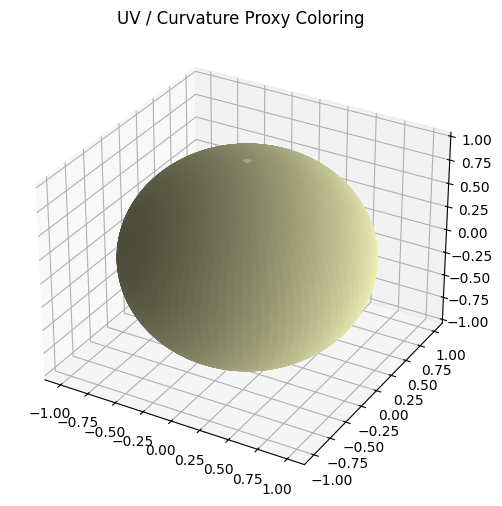

In [ ]:
R = np.sqrt(X**2 + Y**2 + Z**2)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=cm.magma(R / np.max(R)), rstride=1, cstride=1)
ax.set_title("UV / Curvature Proxy Coloring")
plt.show()
